In [23]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize']= 15,6

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [4]:
data.isna().count()

Month          144
#Passengers    144
dtype: int64

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=['Month'],date_parser=dateparse)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [8]:
ts['1949-01-01']

112

In [9]:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [10]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [11]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

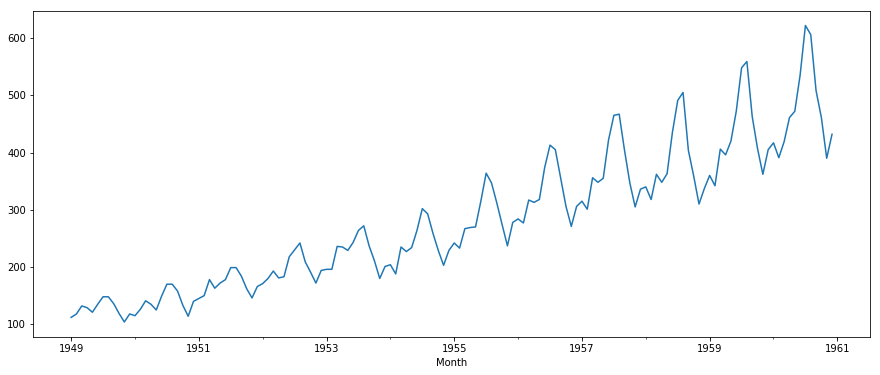

In [30]:
ts.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determine the rolling stats
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #perfoem dickey-fuller test 
    print('Dickey fuller test results')
    dftest= adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print(dfoutput)
    

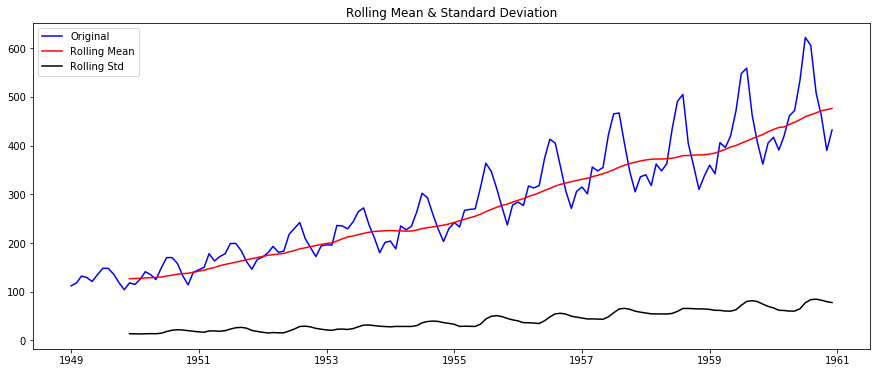

Dickey fuller test results
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value 1%               -3.481682
Critical Value 5%               -2.884042
Critical Value 10%              -2.578770
dtype: float64


In [29]:
test_stationarity(ts)

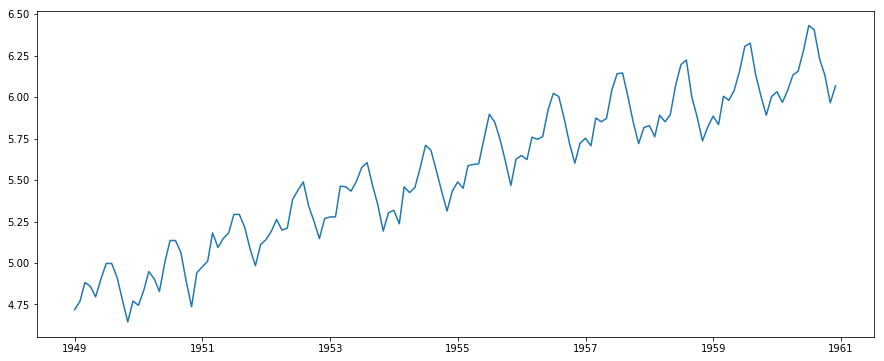

In [28]:
ts_log= np.log(ts)
plt.plot(ts_log)

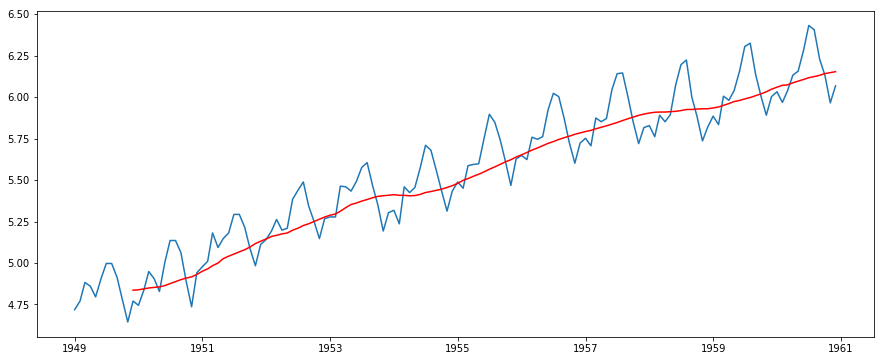

In [27]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [18]:
ts_log_moving_avg_diff = ts_log-moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

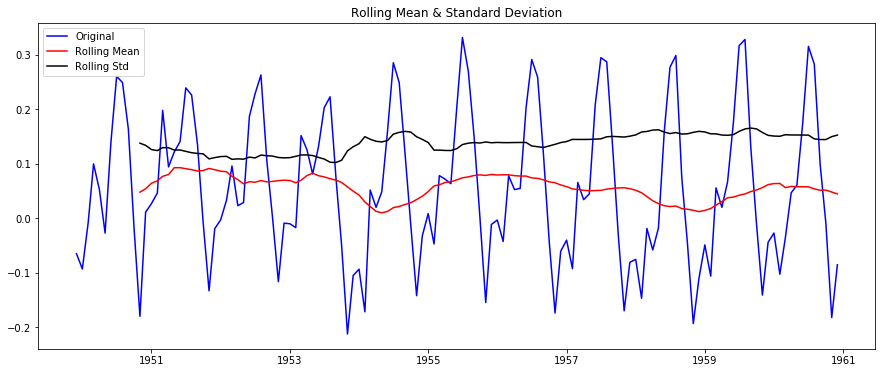

Dickey fuller test results
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value 1%               -3.486535
Critical Value 5%               -2.886151
Critical Value 10%              -2.579896
dtype: float64


In [26]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

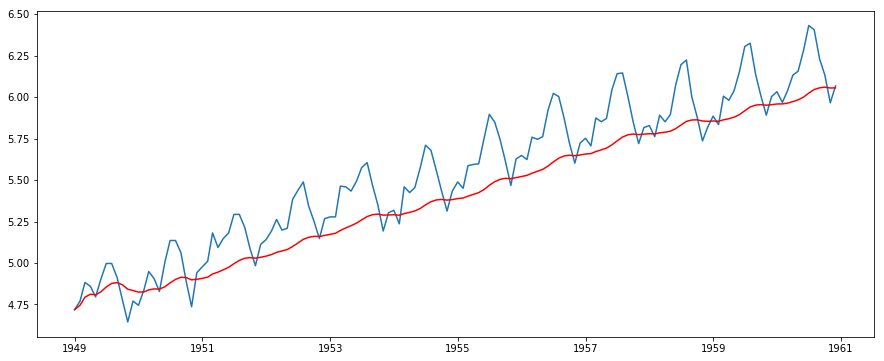

In [31]:
#exponentially weighted moving average
expweighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

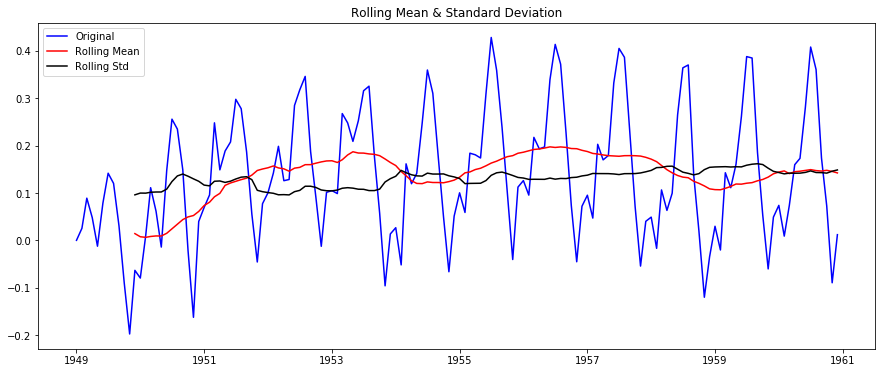

Dickey fuller test results
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value 1%               -3.481682
Critical Value 5%               -2.884042
Critical Value 10%              -2.578770
dtype: float64


In [25]:
ts_log_ewma_diff = ts_log-expweighted_avg
test_stationarity(ts_log_ewma_diff)

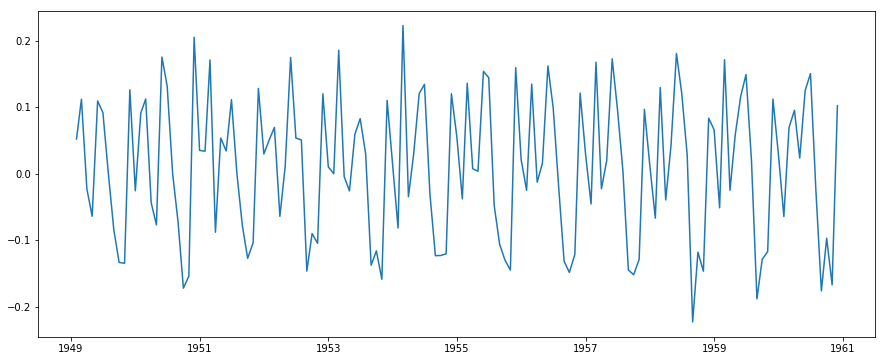

In [55]:
#Differencig - Removing trend and seasonality
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [56]:
ts_log_diff.isna().value_counts()

False    143
True       1
Name: #Passengers, dtype: int64

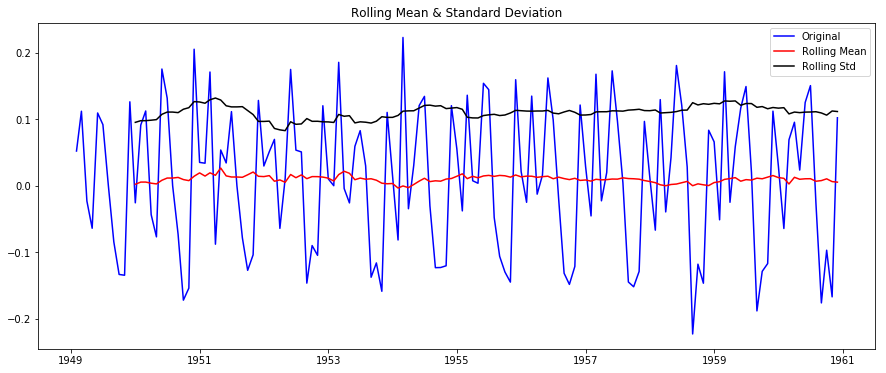

Dickey fuller test results
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value 1%               -3.482501
Critical Value 5%               -2.884398
Critical Value 10%              -2.578960
dtype: float64


In [57]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

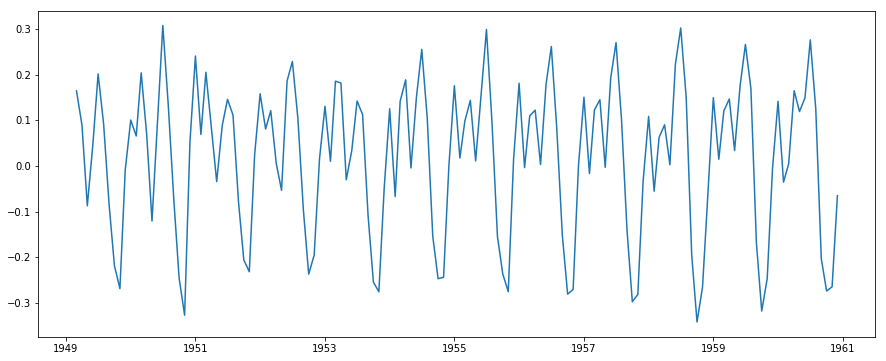

In [77]:
ts_log_diff = ts_log - ts_log.shift(2)
plt.plot(ts_log_diff)

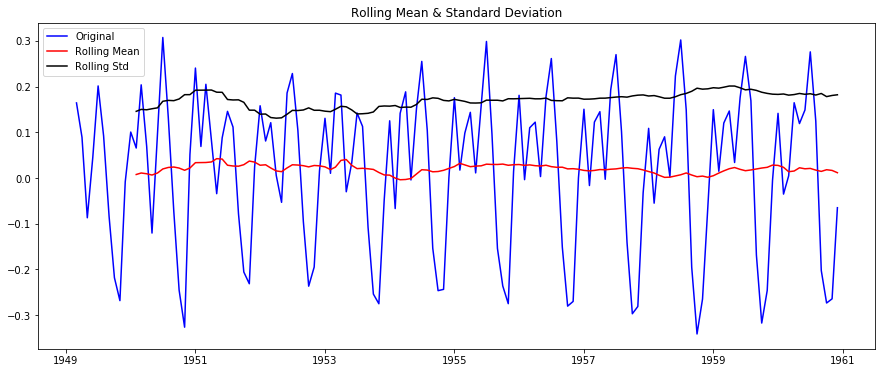

Dickey fuller test results
Test Statistic                  -3.167907
p-value                          0.021919
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value 1%               -3.481682
Critical Value 5%               -2.884042
Critical Value 10%              -2.578770
dtype: float64


In [78]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

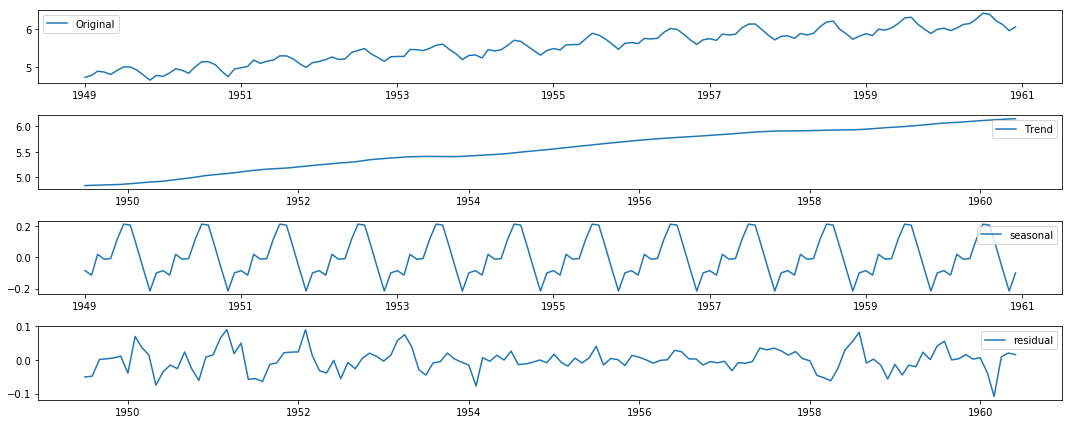

In [79]:
#Decomposing - Residual = original-(trend + seasonal)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()


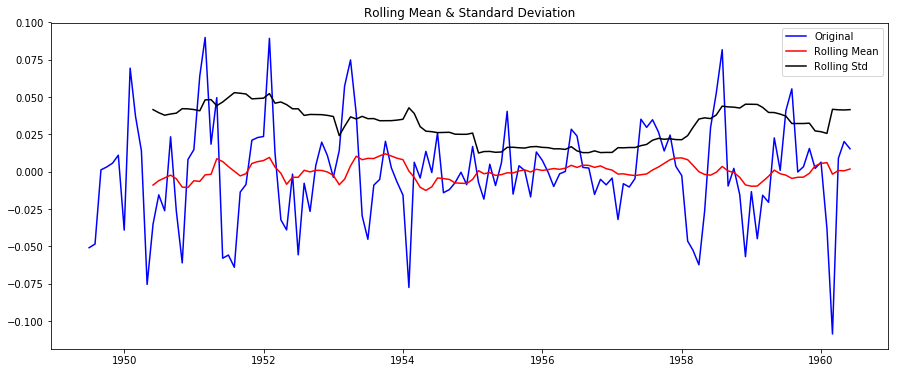

Dickey fuller test results
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value 1%             -3.485122e+00
Critical Value 5%             -2.885538e+00
Critical Value 10%            -2.579569e+00
dtype: float64


In [80]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [81]:
#ACF and PACF Plots
from statsmodels.tsa.stattools import acf, pacf


In [82]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')


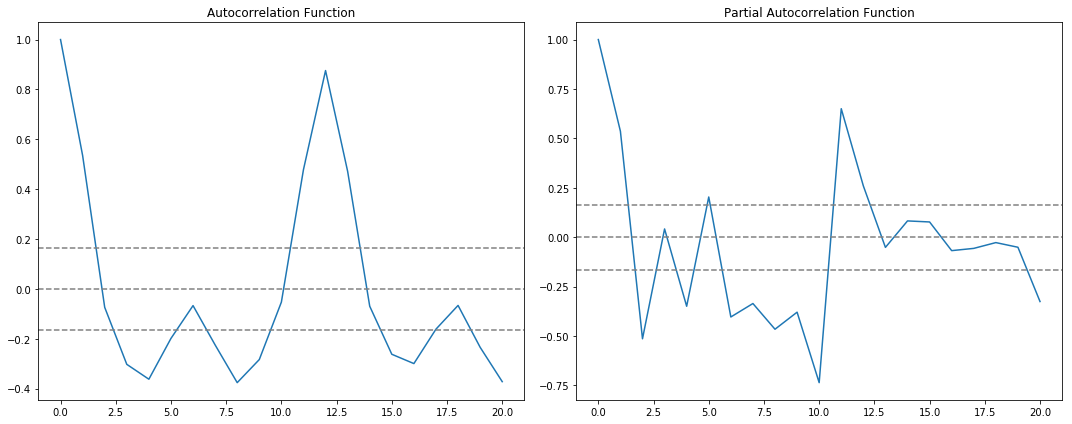

In [83]:
#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot ACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#p=2, q=2 - number of crossing above the top confidence line

In [84]:
from statsmodels.tsa.arima_model import ARIMA

AR MODEL

C:\Users\Santhosh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Santhosh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

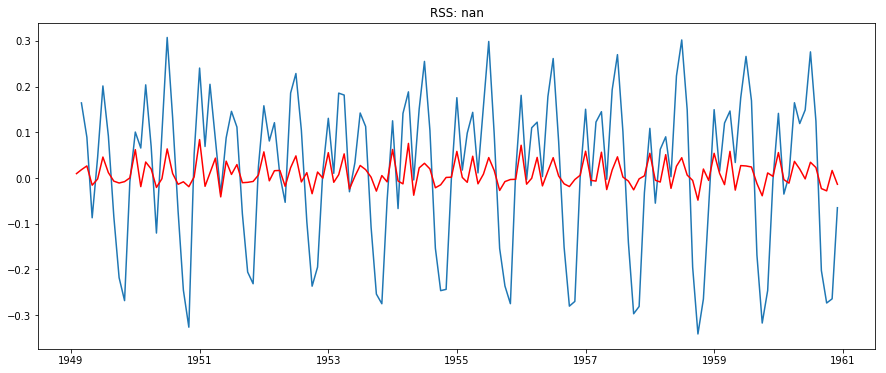

In [85]:
model = ARIMA(ts_log, order=(2,1,0))
result_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((result_AR.fittedvalues-ts_log_diff)**2))

MA MODEL

C:\Users\Santhosh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Santhosh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

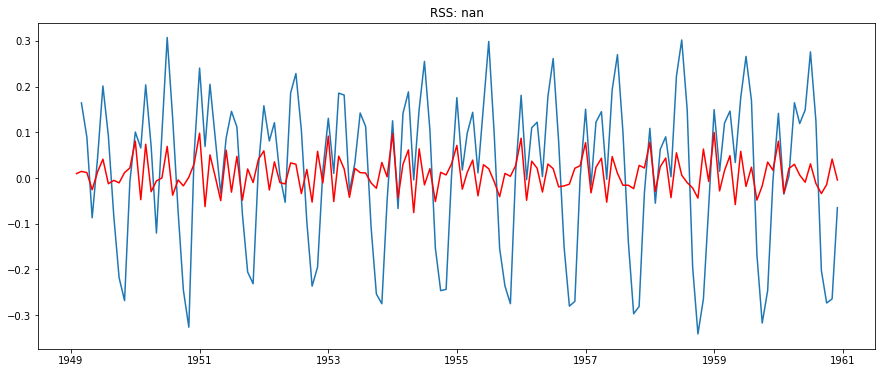

In [86]:
model = ARIMA(ts_log, order=(0,1,2))
result_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((result_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Santhosh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Santhosh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

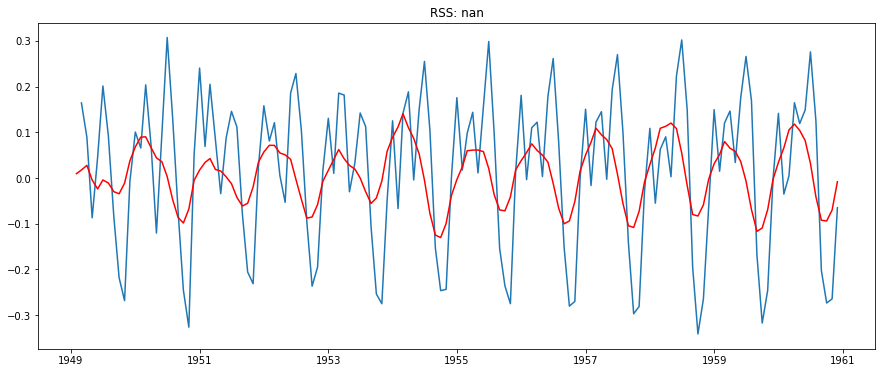

In [87]:
#Combined model
model = ARIMA(ts_log, order=(2,1,2))
result_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((result_ARIMA.fittedvalues-ts_log_diff)**2))

TAKING IT BACK TO ORIGINAL SCALE

In [88]:
predictions_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [89]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [90]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,'RMSE: 90.1041')

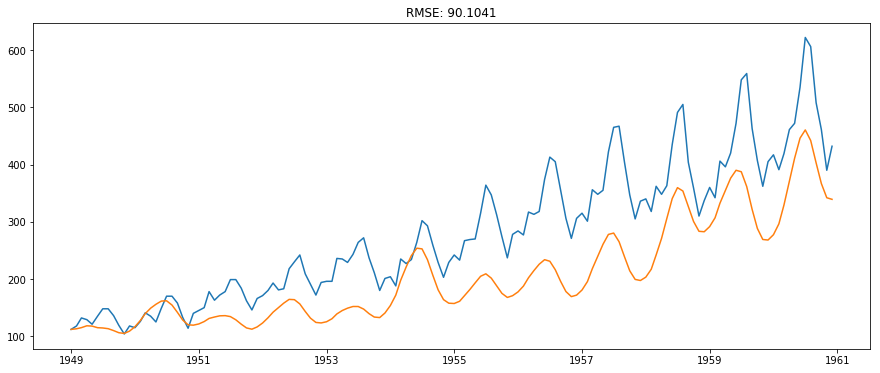

In [91]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f' %np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))